In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Exited Column

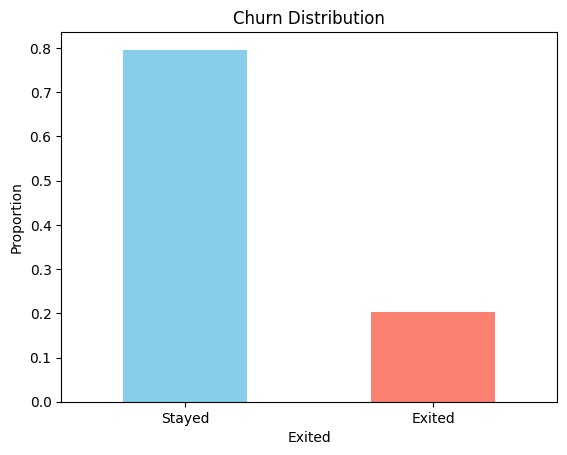

In [7]:
df['Exited'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Stayed', 'Exited'], rotation=0)
plt.ylabel('Proportion')
plt.show()


In [8]:
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(churn_rate)


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

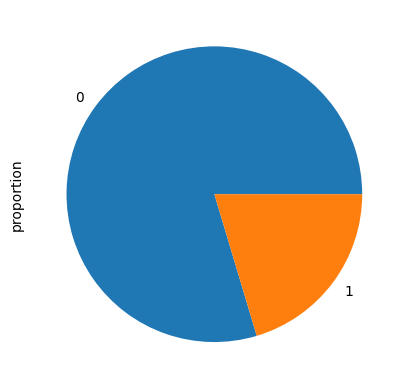

In [9]:
df['Exited'].value_counts(normalize=True).plot(kind='pie')

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Check For Missing Data

In [13]:
missing=df.isnull().sum()
print(missing)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Now we will be check each column one by one

<Axes: ylabel='Frequency'>

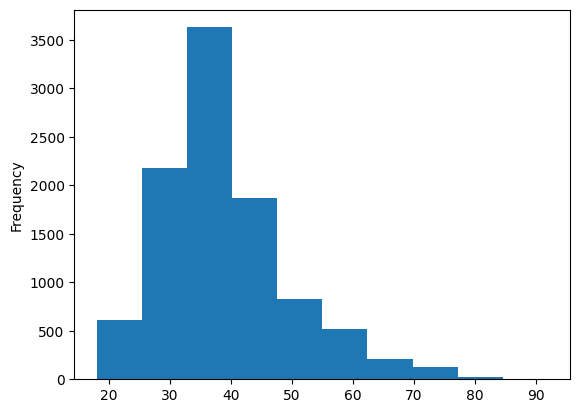

In [14]:
df['Age'].plot(kind='hist')

In [15]:
df[df['Age']<=0].value_counts().sum()

0

<Axes: ylabel='Frequency'>

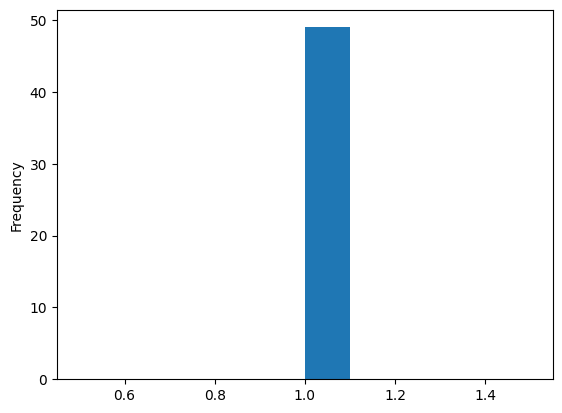

In [16]:
df[(df['Age']>=5) & (df['Age']<20)].value_counts().plot(kind='hist')

In [17]:
print('Minimum Age:',df['Age'].min(),"\n",'Maximum Age:',df['Age'].max())
# here i am analyze the age column to min and max to get a one by one insights from the data

Minimum Age: 18 
 Maximum Age: 92


In [26]:
# now i have define age age group to understand the no and percentage of the age in out dataset

# Define Age Gropus
age_group=pd.cut(
    df['Age'],
    bins=[0,19,39,59,60],# here we define the bounderies of age group
    # here 0-19 one bin
    # 19-39 one bin
    # 39-59 one bin and so on
    labels=['Teenager/child(13-19)','Adults(20-39)','Middle-aged(39-58)','Senior(60+)']
    
)
age_counts=age_group.value_counts().sort_index()

In [28]:
age_counts

Age
Teenager/child(13-19)      49
Adults(20-39)            5938
Middle-aged(39-58)       3487
Senior(60+)                62
Name: count, dtype: int64

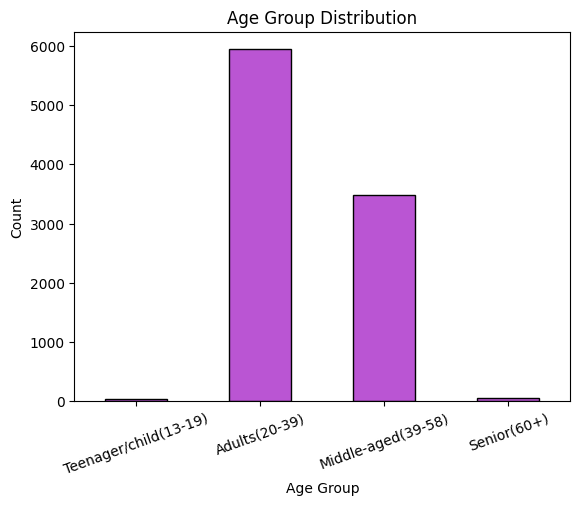

In [27]:
# now we draw the graph on age_counts
age_counts.plot(
    kind='bar',# this is the type of the graph
    color='#BA55D3',
    edgecolor='black',
    title='Age Group Distribution',
    xlabel='Age Group',
    ylabel='Count'
)

plt.xticks(rotation=20)
plt.show()

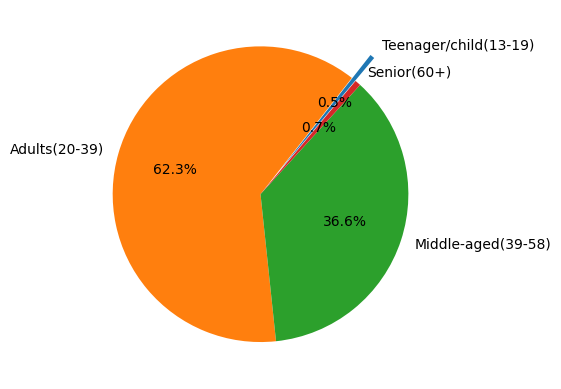

Age
Teenager/child(13-19)      49
Adults(20-39)            5938
Middle-aged(39-58)       3487
Senior(60+)                62
Name: count, dtype: int64


In [30]:
age_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=50,
    explode=(0.2, 0, 0,0)
)
plt.ylabel('')
plt.show()
print(age_counts)

# Age with output column Exited

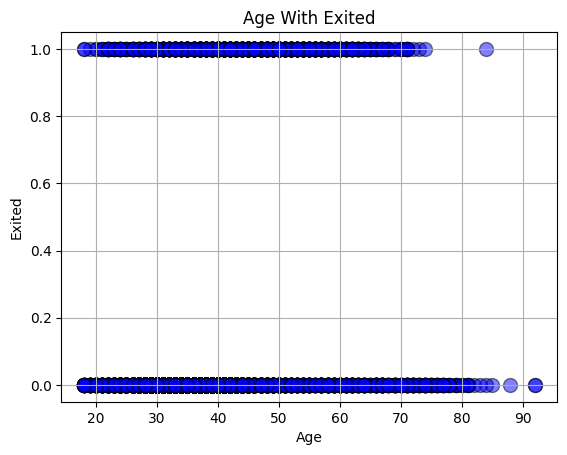

In [31]:
# Scatter plot
plt.scatter(df['Age'],df['Exited'], color='blue', s=100, alpha=0.5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Exited')
plt.title('Age With Exited')
# Show grid
plt.grid(True)
# Display the plot
plt.show()

In [38]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40, 50]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40, 50]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40, 50]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(30, 40]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,"(30, 40]"
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,"(30, 40]"
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,"(30, 40]"
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,"(40, 50]"


In [47]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(20, 100, 10))# here i make new column with the name
# 'Age_Group' and i use the cut function to categorize each customer age into the bins
# and the range function create the bin from 20 to 90 in steps of 10
chern_rate=(df.groupby('Age_Group')['Exited'].mean()).reset_index()
# Calculate the mean churn rate per age group & convert to percentage  
# and now we plot it


C:\Users\India\AppData\Local\Temp\ipykernel_12972\1094555109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chern_rate=(df.groupby('Age_Group')['Exited'].mean()).reset_index()


In [48]:
chern_rate

,Age_Group,Exited
0,"(20, 30]",0.076104
1,"(30, 40]",0.120872
2,"(40, 50]",0.339655
3,"(50, 60]",0.562108
4,"(60, 70]",0.314199
5,"(70, 80]",0.082645
6,"(80, 90]",0.100000


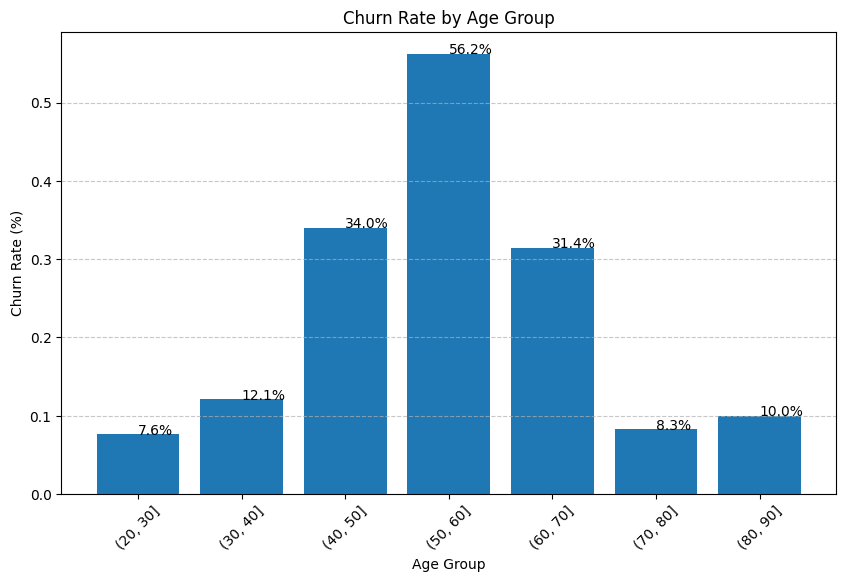


# here i am understand the the age (20-30)- 7.6% people exited
#(30-40) 12.1% people exited .........(80-90) 10% people exited 
# Customers aged 50-60 have > 50% churn rate means here urgent attention needed
# second risk in group (40,50)



In [50]:
plt.figure(figsize=(10,6))
bars=plt.bar(chern_rate['Age_Group'].astype(str),chern_rate['Exited'])
for bar in bars:
    height=bar.get_height()
    #text(X_location,Y_location,text to display)
    plt.text(bar.get_x() + bar.get_width()/2.,height,f'{height:.1%}')

plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# here i am understand the the age (20-30)- 7.6% people exited
#(30-40) 12.1% people exited .........(80-90) 10% people exited 
# Customers aged 50-60 have > 50% churn rate means here urgent attention needed
# second risk in group (40,50)
print('''
# here i am understand the the age (20-30)- 7.6% people exited
#(30-40) 12.1% people exited .........(80-90) 10% people exited 
# Customers aged 50-60 have > 50% churn rate means here urgent attention needed
# second risk in group (40,50)
''')